In [50]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

# 1. Reading and Understanding the Data

In [2]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


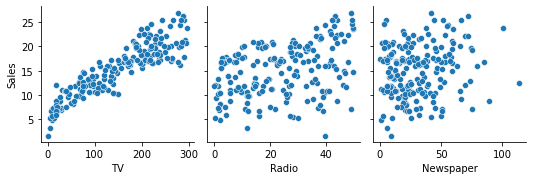

In [8]:
sns.pairplot(data=df, x_vars=["TV","Radio","Newspaper"], y_vars="Sales")
plt.show()

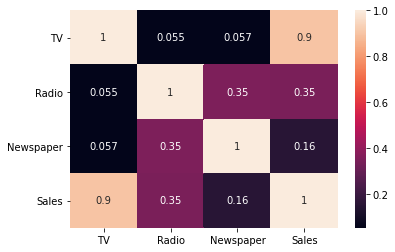

In [10]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [29]:
# Split the data into X and y

X = df.iloc[:,0:1]
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [30]:
y = df.iloc[:,-1]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [31]:
# Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=100, train_size=0.7)

In [32]:
X_train

,TV
74,213.4
3,151.5
185,205.0
26,142.9
90,134.3
...,...
87,110.7
103,187.9
67,139.3
24,62.3


In [33]:
X_test.head()

,TV
126,7.8
104,238.2
99,135.2
92,217.7
111,241.7


In [34]:
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [35]:
y_test.head()

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
Name: Sales, dtype: float64

In [39]:
# Create Object Class
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
lr.coef_

array([0.05454575])

In [41]:
lr.intercept_

6.948683200001357

In [42]:
# Make prediction on Train set and Test set

In [43]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [60]:
# Evaluate the model

print("Prediction on Training Data Set :- ",r2_score(y_true=y_train, y_pred=y_train_pred)) # making prediction on training set
print("Prediction on Test Data Set :- ",r2_score(y_true=y_test, y_pred=y_test_pred)) # making prediction on test set

Prediction on Training Data Set :-  0.8157933136480389
Prediction on Test Data Set :-  0.7921031601245662


In [55]:
# Residual Analysis on train set

error = y_train - y_train_pred

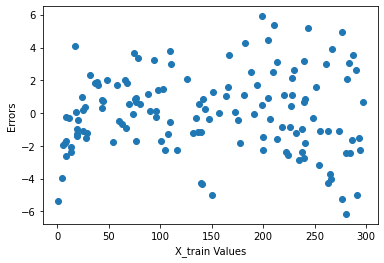

In [57]:
plt.scatter(X_train,error)
plt.xlabel("X_train Values")
plt.ylabel("Errors")
plt.show()

From the above we can say that - 

1. Errors are nomally distributed.
2. Error terms are independent to each other.